In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

In [36]:
Grizzlies_DF_Final = pd.read_csv('C:/Users/LukeB/OneDrive/Documents/Datasets/Grizzlies_DF_Final.csv')
Knicks_DF_Final = pd.read_csv('C:/Users/LukeB/OneDrive/Documents/Datasets/Knicks_DF_Final.csv')

In [37]:
def clean_text(text):
    words = word_tokenize(text)
    words = [re.sub(r'[^a-zA-Z]', '', word).lower() for word in words]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if word]
    cleaned_text = ' '.join(words)
    return cleaned_text

Grizzlies_DF_Final['text'] = Grizzlies_DF_Final['text'].apply(clean_text)
Knicks_DF_Final['text'] = Knicks_DF_Final['text'].apply(clean_text)

In [38]:
def text2tokens(text):
    
    text_lower = text.lower()
    
    tokens = word_tokenize(text_lower)
    
    stop_words = set(stopwords.words('english'))

    tokens = [t for t in tokens if t not in stop_words]
    
    tokens = [t for t in tokens if len(t) >= 3]
    
    stemmer = PorterStemmer()
    
    tokens = [stemmer.stem(t) for t in tokens]

    return tokens
    

In [39]:
Grizzlies_DF_Final['tokens'] = Grizzlies_DF_Final['text'].apply(lambda x: text2tokens(x))
Knicks_DF_Final['tokens'] = Knicks_DF_Final['text'].apply(lambda x: text2tokens(x))

In [40]:
def count_token_freq(df):
    token_freq = Counter()
    for tokens in df['tokens']:
        token_freq.update(tokens)
    return token_freq

grizzlies_token_freq = count_token_freq(Grizzlies_DF_Final)
knicks_token_freq = count_token_freq(Knicks_DF_Final)

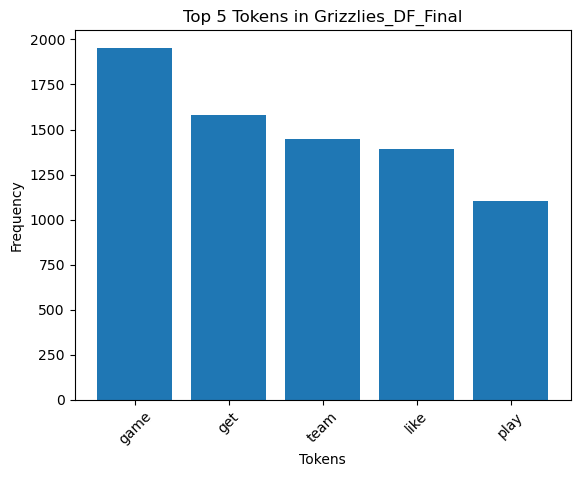

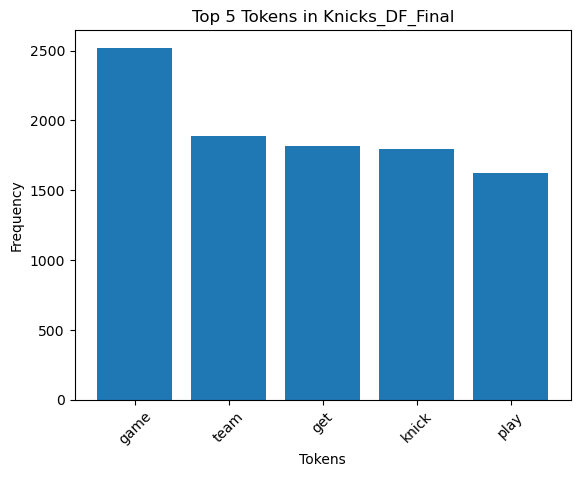

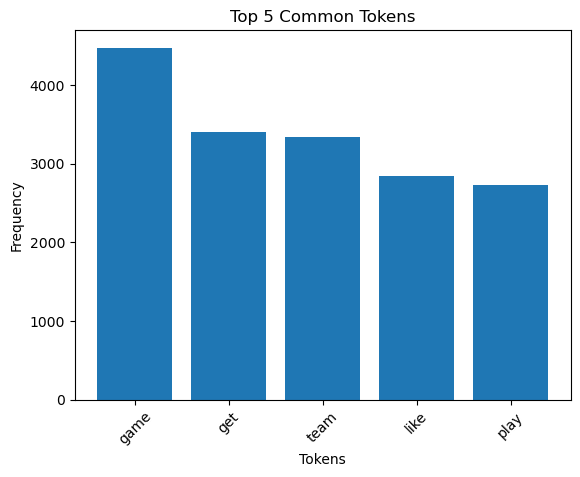

In [41]:
def plot_top_tokens(token_freq, title):
    plt.bar(*zip(*token_freq.most_common(5)))
    plt.title(title)
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_top_tokens(grizzlies_token_freq, 'Top 5 Tokens in Grizzlies_DF_Final')
plot_top_tokens(knicks_token_freq, 'Top 5 Tokens in Knicks_DF_Final')

common_tokens = set(grizzlies_token_freq.keys()) & set(knicks_token_freq.keys())

common_token_freq = {token: grizzlies_token_freq[token] + knicks_token_freq[token] for token in common_tokens}

plot_top_tokens(Counter(common_token_freq), 'Top 5 Common Tokens')